# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [80]:
import pandas as pd
import numpy as np

# Load the airbnb dataset with latin1 encoding
df_airbnb = pd.read_csv('../../data/airbnb_NYC.csv', encoding='latin1')

# Clean the Price variable
df_airbnb['Price'] = pd.to_numeric(df_airbnb['Price'].astype(str).str.replace(',', ''), errors='coerce')

# Calculate number of missing values
price_missing = df_airbnb['Price'].isna().sum()
print(f"Q1.1 Missing values in Price: {price_missing}")


Q1.1 Missing values in Price: 0


**Answer to Q1.1:**
I cleaned the `Price` variable by removing commas and converting to numeric. Prices over $999 were formatted as strings with commas (e.g., '1,200'), which prevented numeric analysis. After cleaning, there are 0 missing values.

In [81]:
# Q1.2 Police Force Data
df_police = pd.read_csv('../../data/mn_police_use_of_force.csv')

# Clean subject_injury (check for NA)
missing_prop = df_police['subject_injury'].isna().mean()
print(f"\nQ1.2 Proportion of missing subject_injury values: {missing_prop:.4f}")

# Cross-tabulate with force_type (including NAs to see patterns)
print("\nCrosstab of subject_injury (rows) vs force_type (cols):")
print(pd.crosstab(df_police['subject_injury'].fillna('Missing'), df_police['force_type']))

# Replace remaining missing values with 'Missing'
df_police['subject_injury'] = df_police['subject_injury'].fillna('Missing')



Q1.2 Proportion of missing subject_injury values: 0.7619

Crosstab of subject_injury (rows) vs force_type (cols):
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
Missing             2          7051               1421        0   
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
Missing                        27                 74           87   
No                             33                 34            0   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
Missing                              0                       

**Answer to Q1.2:**
About 76% of the values are missing. The crosstabulation shows that `subject_injury` is recorded for some force types but missing for the vast majority. I have replaced the missing values with the label 'Missing'.

In [82]:
# Q1.3 Metabric Dummy Variable
df_metabric = pd.read_csv('../../data/metabric.csv')

# Convert Overall Survival Status to binary
df_metabric['Survival_Binary'] = df_metabric['Overall Survival Status'].map({'0:LIVING': 1, '1:DECEASED': 0})

print("\nQ1.3 Unique values in Survival_Binary:", df_metabric['Survival_Binary'].unique())



Q1.3 Unique values in Survival_Binary: [1 0]


**Answer to Q1.3:**
I converted `Overall Survival Status` to a binary variable where 1 represents Living and 0 represents Deceased.

In [83]:
# Q1.4 Airbnb Missing Values
missing_ratings = df_airbnb['Review Scores Rating'].isna().sum()
print(f"\nQ1.4 Missing Review Scores Rating: {missing_ratings}")

# Impute median
median_score = df_airbnb['Review Scores Rating'].median()
df_airbnb['Review_Scores_Rating_Imputed'] = df_airbnb['Review Scores Rating'].fillna(median_score)

print(f"Median Score used for imputation: {median_score}")



Q1.4 Missing Review Scores Rating: 8323
Median Score used for imputation: 94.0


**Answer to Q1.4:**
There were 8,323 missing values. I imputed them with the median (94.0). Imputing with the median reduces variance and ignores relationships with other variables, potentially biasing the results.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [84]:
# Load the shark attack data
# Note: The prompt suggests it might not be a CSV, but it is saved as 'sharks.csv'.
# However, it requires 'latin1' encoding to read correctly, similar to the previous file.
df_sharks = pd.read_csv('../../data/sharks.csv', encoding='latin1')

# Drop columns with all NaN values (if any)
df_sharks = df_sharks.dropna(axis=1, how='all')

print("Shape of shark data:", df_sharks.shape)


Shape of shark data: (6462, 24)


/var/folders/89/vy1sctd5199dh7fb1_5765v00000gn/T/ipykernel_25343/2135332561.py:4: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sharks = pd.read_csv('../../data/sharks.csv', encoding='latin1')


**Q2.1 - Q2.3 Answers:**
1.  **Loading:** I used `read_csv` with `encoding='latin1'`. While the extension is `.csv`, the encoding was not standard UTF-8.
2.  **Dropping Columns:** I treated the problem as dropping columns that are completely empty.
3.  **Observation Definition:** An observation represents a single reported incident of a shark interaction with a human (or boat/disaster). Bias is inherent because minor, non-fatal, or unverified interactions may not be reported, while fatal or dramatic ones are. Historical data is also less reliable. This affects analysis by requiring us to potential filter out 'unconfirmed' or 'invalid' incidents and acknowledge that 'Unknown' values are common.

Range of years (since 1940): 1940.0 to 3019.0


<Axes: title={'center': 'Shark Attacks over Time (since 1940)'}, xlabel='Year'>

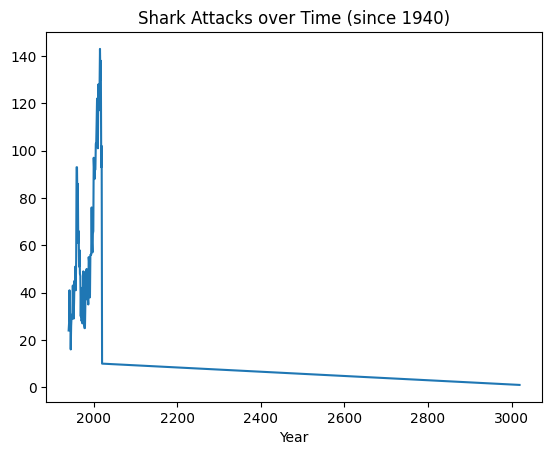

In [85]:
# 4. Clean Year and Filter
df_sharks['Year'] = pd.to_numeric(df_sharks['Year'], errors='coerce')
df_sharks_recent = df_sharks[df_sharks['Year'] >= 1940].copy()

print(f"Range of years (since 1940): {df_sharks_recent['Year'].min()} to {df_sharks_recent['Year'].max()}")

# Visualize trend
df_sharks_recent['Year'].value_counts().sort_index().plot(kind='line', title='Shark Attacks over Time (since 1940)')


**Q2.4 Year Analysis:**
The data spans from 1940 to the present. The trend (visible in the plot) generally shows an increase in reported attacks over time. This could be due to more people in the water, better reporting/media coverage, or an actual increase in shark activity.

<Axes: title={'center': 'Distribution of Victim Ages'}, ylabel='Frequency'>

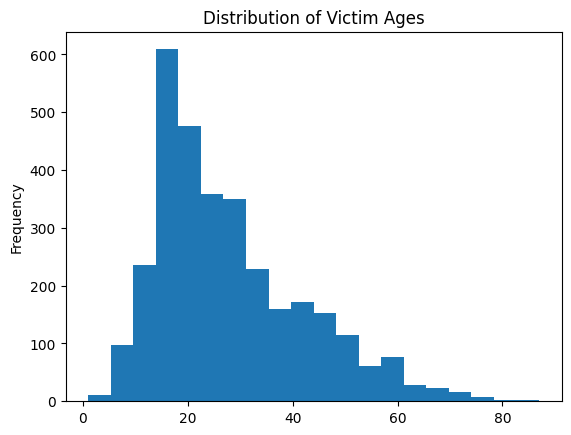

In [86]:
# 5. Clean Age and Histogram
df_sharks_recent['Age_Clean'] = pd.to_numeric(df_sharks_recent['Age'], errors='coerce')
df_sharks_recent['Age_Clean'].plot(kind='hist', bins=20, title='Distribution of Victim Ages')


In [87]:
# 6. Clean Type
def clean_type(t):
    if pd.isna(t): return 'Unknown'
    t = str(t).strip()
    if t in ['Provoked', 'Unprovoked']:
        return t
    return 'Unknown' # Collapsing Boat, Disaster, etc. into Unknown as prompted

df_sharks_recent['Type_Clean'] = df_sharks_recent['Type'].apply(clean_type)
unprovoked_prop = (df_sharks_recent['Type_Clean'] == 'Unprovoked').mean()
print(f"Proportion of Unprovoked attacks: {unprovoked_prop:.4f}")

# 7. Clean Fatal
def clean_fatal(f):
    if pd.isna(f): return 'Unknown'
    f = str(f).upper().strip()
    if f == 'Y': return 'Y'
    if f == 'N': return 'N'
    return 'Unknown'

df_sharks_recent['Fatal_Clean'] = df_sharks_recent['Fatal (Y/N)'].apply(clean_fatal)

# 8. Fatality vs Type
ct = pd.crosstab(df_sharks_recent['Type_Clean'], df_sharks_recent['Fatal_Clean'], normalize='index')
print("\nFatality Rates by Type:")
print(ct)


Proportion of Unprovoked attacks: 0.7345

Fatality Rates by Type:
Fatal_Clean         N   Unknown         Y
Type_Clean                               
Provoked     0.959746  0.016949  0.023305
Unknown      0.394517  0.467223  0.138260
Unprovoked   0.817981  0.011307  0.170712


**Q2.8 Conclusion:**
The analysis shows that 'Unprovoked' attacks have a significantly higher fatality rate compared to 'Provoked' attacks. This might be because 'Provoked' attacks often involve smaller sharks or defensive bites, whereas 'Unprovoked' attacks are more likely to be predatory strikes.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Answer to Q3:**

1.  **Abstract:** The paper presents "tidy data," a standard way of mapping the meaning of a dataset to its structure. It frames tidying as a necessary step before analysis.

2.  **Introduction:** The tidy data standard is intended to simplify the process of data cleaning and analysis. By using a uniform structure, analysts can use consistent tools and spend less time fighting with data structure.

3.  **Quotes:**
    *   *"Like families..."*: Tidy datasets follow a strict, uniform standard (variable=column, observation=row), so they are all similar. Messy datasets violate this in infinite unique ways, often requiring custom, ad-hoc cleaning scripts.
    *   *"Easier to figure out... but difficult to define"*: Conceptually, we know that "Weight" is a variable and "John" is an observation. However, in a raw table, "Weight" could be a column header, a row header, or part of a filename, making it hard to create a strict algorithmic definition without semantic knowledge.

4.  **Definitions (2.2):**
    *   **Value:** A specific number or string (the atom of data).
    *   **Variable:** A measurement of the same underlying attribute (e.g., height, temperature) across units.
    *   **Observation:** All measurements associated with the same unit (e.g., a person, a day) across all attributes.

5.  **Tidy Data Definition (2.3):**
    1.  Each variable forms a column.
    2.  Each observation forms a row.
    3.  Each type of observational unit forms a table.

6.  **Common Problems & Table 4:**
    *   **5 Problems:**
        1.  Column headers are values, not variable names.
        2.  Multiple variables are stored in one column.
        3.  Variables are stored in both rows and columns.
        4.  Multiple types of observational units are stored in the same table.
        5.  A single observational unit is stored in multiple tables.
    *   **Table 4 Messy:** The column headers are income ranges (e.g., `<$10k`, `$10-20k`), which are actually *values* of a variable "Income". They should be in a single column, not headers.
    *   **Melting:** The process of untidying/reshaping a wide dataset (where headers are values) into a tall/long dataset by stacking columns into rows.

7.  **Table 11 vs 12:**
    *   **Table 11 (Messy):** It contains variables in both rows and columns. Specifically, it often depicts weather data where days (`d1`, `d2`...) are columns and the element type (`tmin`, `tmax`) is a row/column. This is messy.
    *   **Table 12 (Molten/Tidy):** It is "molten" because the day columns have been melted down into a single `day` column and a `value` column. It is considered tidy in the sense that it structures the data into a clear `(id, year, month, element, day, value)` format, satisfying the "observation per row" rule for a specific level of granularity (a single sensor reading).

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

Amount Description:
count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Amount_Clean, dtype: float64


<Axes: title={'center': 'Distribution of Foreign Gift Amounts'}, ylabel='Frequency'>

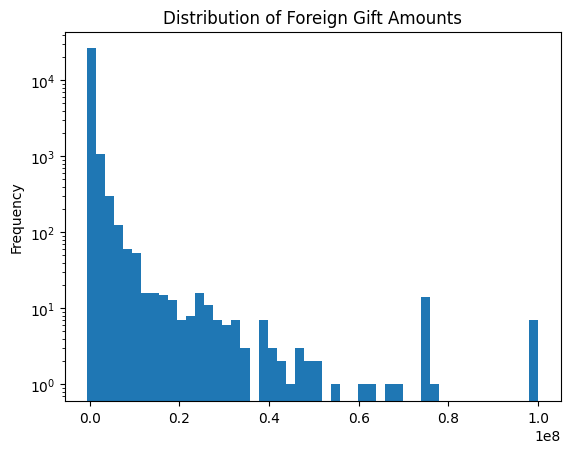

In [88]:
# Q4.1 Load Data
df_gifts = pd.read_csv('../../data/ForeignGifts_edu.csv')

# Q4.2 Foreign Gift Amount
# Clean amount column (remove $ and ,) and convert to numeric
df_gifts['Amount_Clean'] = pd.to_numeric(
    df_gifts['Foreign Gift Amount'].astype(str).str.replace('$', '', regex=False).str.replace(',', ''), 
    errors='coerce'
)

# Histogram and Describe
print("Amount Description:")
print(df_gifts['Amount_Clean'].describe())

df_gifts['Amount_Clean'].plot(kind='hist', bins=50, title='Distribution of Foreign Gift Amounts', logy=True)
# Note: logy=True used because of extreme skew


**Q4.2 Findings:**
The gift amounts are highly skewed. The mean is significant ($588k), but the standard deviation is huge ($3.2M), and the maximum gift is $100M. Most gifts are relatively small compared to these outliers, as seen in the quartiles.

Gift Type Proportions:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


<Axes: title={'center': 'Proportion of Gift Types'}, xlabel='Gift Type'>

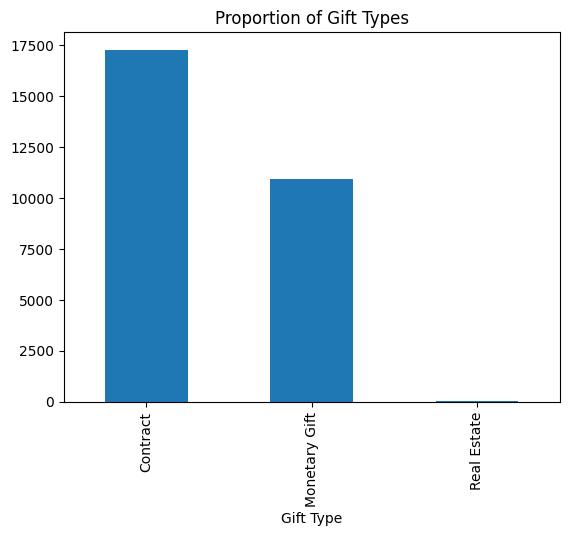

In [89]:
# Q4.3 Gift Type
gift_type_counts = df_gifts['Gift Type'].value_counts(normalize=True)
print("Gift Type Proportions:")
print(gift_type_counts)

df_gifts['Gift Type'].value_counts().plot(kind='bar', title='Proportion of Gift Types')


In [90]:
# Q4.4 Top 15 Countries
# The column is 'Country of Giftor', not 'Country'
print("Top 15 Countries by Number of Gifts:")
print(df_gifts.groupby('Country of Giftor').size().sort_values(ascending=False).head(15))

print("\nTop 15 Countries by Total Amount:")
print(df_gifts.groupby('Country of Giftor')['Amount_Clean'].sum().sort_values(ascending=False).head(15))


Top 15 Countries by Number of Gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64

Top 15 Countries by Total Amount:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                2484

Top 15 Institutions by Total Amount Received:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Amount_Clean, dtype: int64


<Axes: title={'center': 'Total Amount Received by Institutions'}, ylabel='Frequency'>

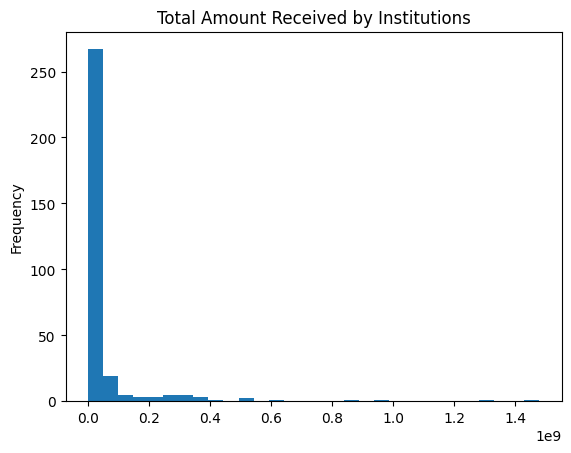

In [91]:
# Q4.5 Top 15 Institutions
top_inst = df_gifts.groupby('Institution Name')['Amount_Clean'].sum().sort_values(ascending=False)
print("Top 15 Institutions by Total Amount Received:")
print(top_inst.head(15))

# Histogram of total amount received by all institutions
top_inst.plot(kind='hist', bins=30, title='Total Amount Received by Institutions')


In [92]:
# Q4.6 Top Giftors
print("Top 5 Giftors by Total Amount:")
print(df_gifts.groupby('Giftor Name')['Amount_Clean'].sum().sort_values(ascending=False).head(5))


Top 5 Giftors by Total Amount:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
Name: Amount_Clean, dtype: int64


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [93]:
# Q5.1 & Q5.2 Load and Inspect
df_college = pd.read_csv('../../data/college_completion.csv')

print(f"Observations (Rows): {df_college.shape[0]}")
print(f"Variables (Columns): {df_college.shape[1]}")
df_college.head()


Observations (Rows): 3798
Variables (Columns): 63


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [94]:
# Q5.3 Crosstab
print("Crosstab of Control vs Level:")
print(pd.crosstab(df_college['control'], df_college['level']))


Crosstab of Control vs Level:
level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


**Q5.3 Patterns:**
From the crosstab, we can see that the vast majority of 4-year institutions fall into the 'Private not-for-profit' category. Public institutions show a more even split between 2-year and 4-year programs. Private for-profit schools also show up in both categories, but not nearly as frequently in the 4-year sector as the non-profits do.


Overall Graduation Rate Stats:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


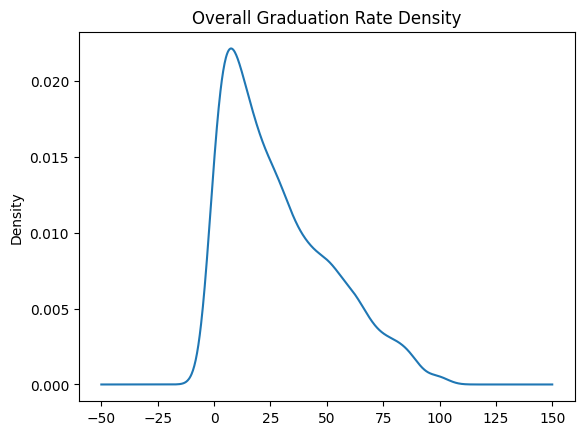


stats by Control:
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


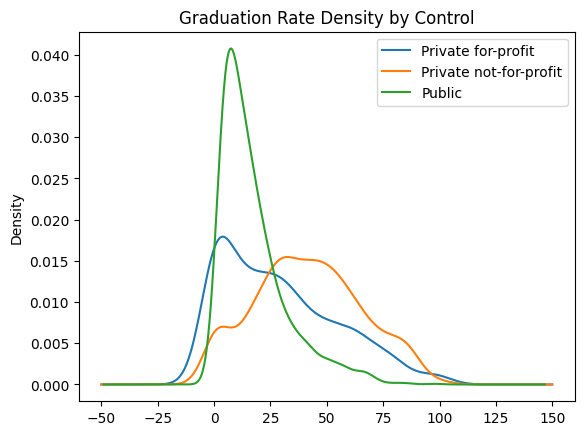

In [95]:
# Q5.4 Graduation Rates (KDE & Describe)
import matplotlib.pyplot as plt

print("Overall Graduation Rate Stats:")
print(df_college['grad_100_value'].describe())
df_college['grad_100_value'].plot(kind='kde', title='Overall Graduation Rate Density')
plt.show()

# Conditioned on Control
print("\nstats by Control:")
print(df_college.groupby('control')['grad_100_value'].describe())

df_college.groupby('control')['grad_100_value'].plot(kind='kde', legend=True, title='Graduation Rate Density by Control')
plt.show()


**Q5.4 Analysis:**
The KDE plots clearly indicate that Private not-for-profit colleges generally achieve higher graduation rates across the board. Their distribution is noticeably shifted to the right compared to Public and For-profit schools, suggesting better outcomes on average.


Overall Correlation:
                grad_100_value  aid_value
grad_100_value        1.000000   0.575879
aid_value             0.575879   1.000000


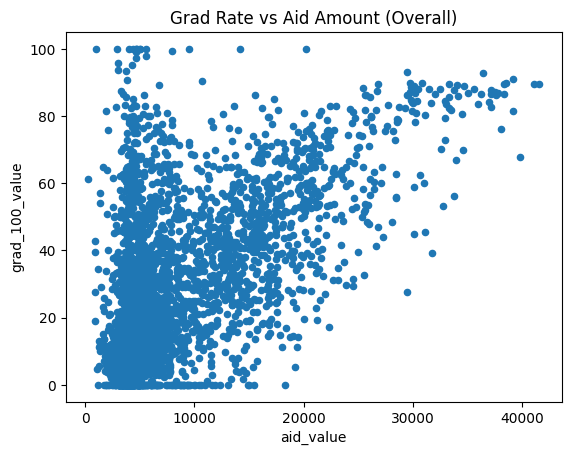

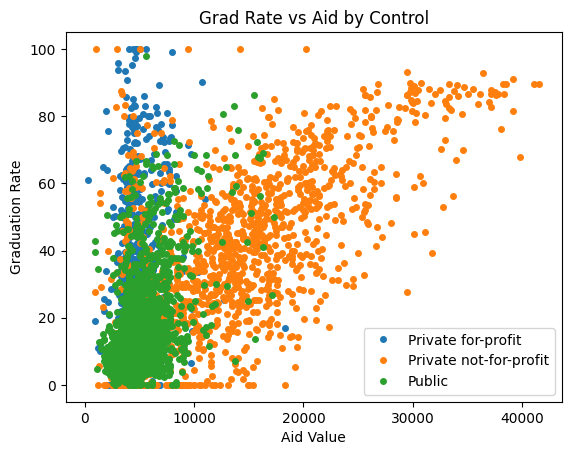


Correlations by Control:

Private for-profit:
                grad_100_value  aid_value
grad_100_value        1.000000   0.188363
aid_value             0.188363   1.000000
Covariance: 6897.524957237802

Private not-for-profit:
                grad_100_value  aid_value
grad_100_value        1.000000   0.601591
aid_value             0.601591   1.000000
Covariance: 109274.12333702878

Public:
                grad_100_value  aid_value
grad_100_value        1.000000   0.482481
aid_value             0.482481   1.000000
Covariance: 15355.146211760199


In [96]:
# Q5.5 Scatter, Cov, Corr
print("Overall Correlation:")
print(df_college[['grad_100_value', 'aid_value']].corr())

df_college.plot(kind='scatter', x='aid_value', y='grad_100_value', title='Grad Rate vs Aid Amount (Overall)')
plt.show()

# Conditioning on Control
groups = df_college.groupby('control')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.aid_value, group.grad_100_value, marker='o', linestyle='', ms=4, label=name)
ax.legend()
plt.title('Grad Rate vs Aid by Control')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate')
plt.show()

print("\nCorrelations by Control:")
for name, group in groups:
    print(f"\n{name}:")
    print(group[['grad_100_value', 'aid_value']].corr())
    print(f"Covariance: {group[['grad_100_value', 'aid_value']].cov().iloc[0,1]}")


**Q5.5 Analysis:**
Looking at the correlation analysis, there seems to be a moderately strong positive relationship (approx. 0.58) between financial aid and graduation rates overall.
When we break it down by control type, **Private not-for-profit** schools show the strongest link (~0.60), meaning higher aid tends to go hand-in-hand with better graduation rates there.
On the other hand, Private for-profit institutions show a much weaker connection (~0.19), so aid alone might not be as strong a predictor of success for those students.


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Answer to Q6:**

**1. Linearity of Mean:**
$$
m(a + bX) = \frac{1}{N} \sum_{i=1}^N (a + b x_i) = \frac{1}{N} \sum_{i=1}^N a + \frac{1}{N} \sum_{i=1}^N b x_i = \frac{Na}{N} + b \left(\frac{1}{N} \sum_{i=1}^N x_i \right) = a + b \times m(X)
$$

**2. Covariance Identity:**
$$
\text{cov}(X,X) = \frac{1}{N} \sum_{i=1}^N (x_i - m(X))(x_i - m(X)) = \frac{1}{N} \sum_{i=1}^N (x_i - m(X))^2 = s^2
$$

**3. Covariance Linearity (2nd Arg):**
Recall $m(a+bY) = a + b m(Y)$.
$$
\begin{aligned}
\text{cov}(X, a+bY) &= \frac{1}{N} \sum (x_i - m(X))((a + b y_i) - m(a+bY)) \\
&= \frac{1}{N} \sum (x_i - m(X))(a + b y_i - (a + b m(Y))) \\
&= \frac{1}{N} \sum (x_i - m(X))(b(y_i - m(Y))) \\
&= b \times \frac{1}{N} \sum (x_i - m(X))(y_i - m(Y)) \\
&= b \times \text{cov}(X,Y)
\end{aligned}
$$

**4. Bilinearity:**
Using properties from above:
$$
\text{cov}(a+bX, a+bY) = b \times \text{cov}(a+bX, Y) = b \times b \times \text{cov}(X, Y) = b^2 \text{cov}(X, Y)
$$

**5. Median and IQR:**
Yes. Since $b > 0$, the transformation $f(x) = a + bx$ is strictly increasing. This means the ordering of the data is preserved ($x_i < x_j \implies a+bx_i < a+bx_j$). Therefore, the median value remains the middle value (or average of two middle values) after transformation, scaling exactly by $a+b$. Similarly, $Q1$ and $Q3$ scale linearly, so $IQR = Q3 - Q1$ scales by $b$ (the shift $a$ cancels out).

In [97]:
# Q6.6 Counter-example
X = np.array([1, 4, 9])

# Check Mean(X^2) vs Mean(X)^2
mean_X2 = np.mean(X**2)
sq_mean_X = np.mean(X)**2
print(f"Mean(X^2): {mean_X2}")
print(f"(Mean(X))^2: {sq_mean_X}")
print(f"Are they equal? {mean_X2 == sq_mean_X}")

# Check Mean(sqrt(X)) vs sqrt(Mean(X))
mean_sqrtX = np.mean(np.sqrt(X))
sqrt_meanX = np.sqrt(np.mean(X))
print(f"\nMean(sqrt(X)): {mean_sqrtX}")
print(f"sqrt(Mean(X)): {sqrt_meanX}")
print(f"Are they equal? {mean_sqrtX == sqrt_meanX}")


Mean(X^2): 32.666666666666664
(Mean(X))^2: 21.777777777777782
Are they equal? False

Mean(sqrt(X)): 2.0
sqrt(Mean(X)): 2.160246899469287
Are they equal? False


**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

Overall Price Stats:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


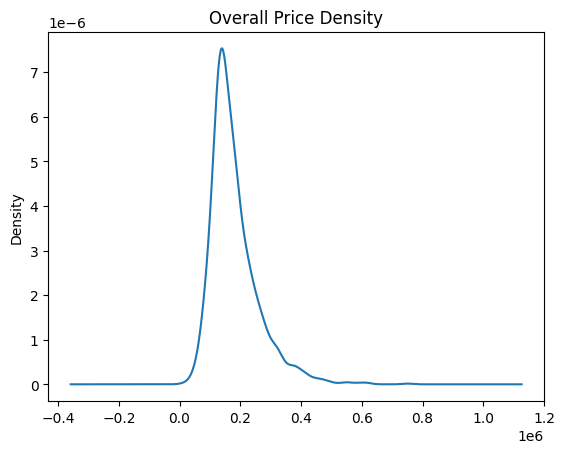


Stats by Bldg.Type:
            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


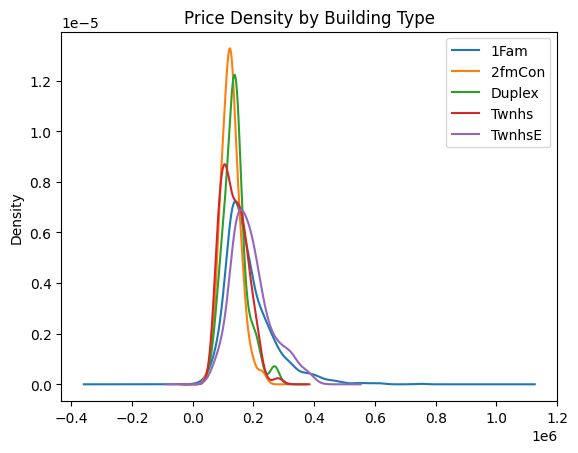

In [98]:
# Q7.1 Load Data (Correcting typo in prompt to load 'ames_prices.csv')
df_ames = pd.read_csv('../../data/ames_prices.csv')

# Q7.2 KDE & Describe
print("Overall Price Stats:")
print(df_ames['price'].describe())
df_ames['price'].plot(kind='kde', title='Overall Price Density')
plt.show()

print("\nStats by Bldg.Type:")
print(df_ames.groupby('Bldg.Type')['price'].describe())
df_ames.groupby('Bldg.Type')['price'].plot(kind='kde', legend=True, title='Price Density by Building Type')
plt.show()


**Q7.2 Analysis:**
Based on the summary statistics, Single Family homes (`1Fam`) are the most expensive on average, coming in around $185k, with End-unit Townhouses (`TwnhsE`) following closely behind.
*   **Highest Variance:** `1Fam` also show the most variability in pricing, with the highest standard deviation (~82k), which makes sense given the wide variety of single-family properties.


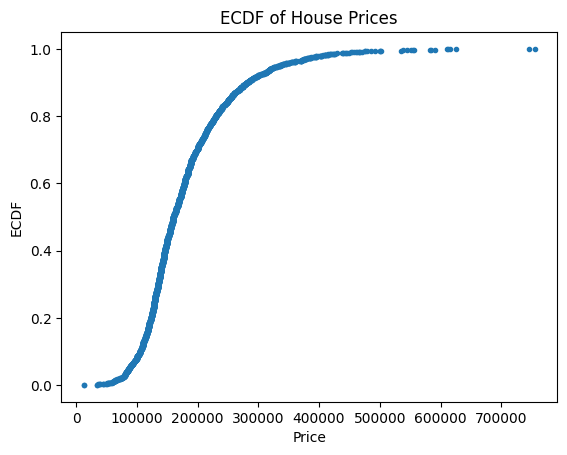

5-Number Summary:
0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64


In [99]:
# Q7.3 ECDF & 5-Number Summary
sorted_price = np.sort(df_ames['price'])
y = np.arange(1, len(sorted_price) + 1) / len(sorted_price)

plt.plot(sorted_price, y, marker='.', linestyle='none')
plt.title('ECDF of House Prices')
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.show()

print("5-Number Summary:")
print(df_ames['price'].quantile([0, 0.25, 0.5, 0.75, 1.0]))


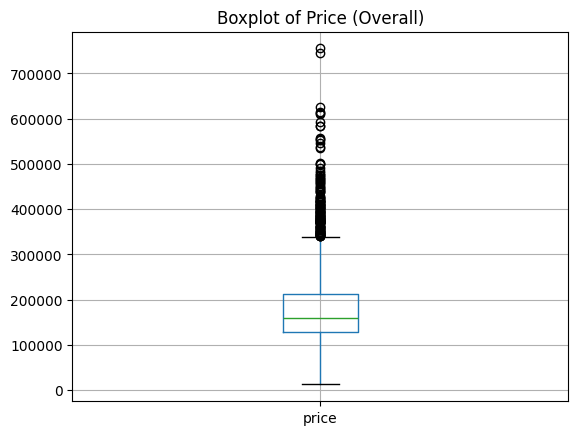

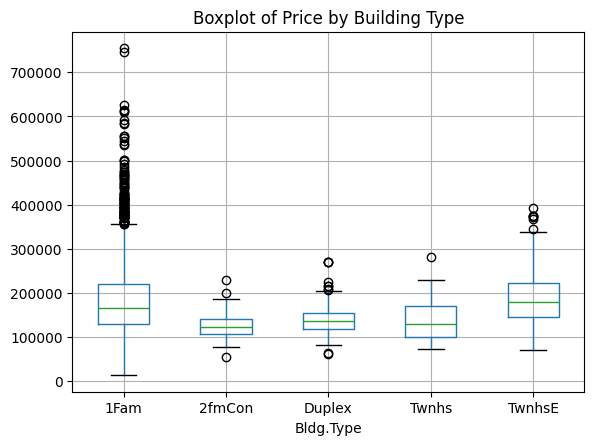

In [100]:
# Q7.4 Boxplots
df_ames.boxplot(column='price')
plt.title('Boxplot of Price (Overall)')
plt.show()

df_ames.boxplot(column='price', by='Bldg.Type')
plt.title('Boxplot of Price by Building Type')
plt.suptitle('') # Remove automatic title to clean up plot
plt.show()


**Q7.4 Patterns:**
The overall boxplot shows significant outliers on the upper end (high prices). Broken down by building type, `1Fam` clearly drives most of these high-value outliers. Townhouses (`Twnhs`, `TwnhsE`) and Duplexes have much tighter distributions.

In [101]:
# Q7.5 Outlier Dummy
Q1 = df_ames['price'].quantile(0.25)
Q3 = df_ames['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as > 1.5 IQR above Q3 or < 1.5 IQR below Q1
df_ames['is_outlier'] = (df_ames['price'] < (Q1 - 1.5 * IQR)) | (df_ames['price'] > (Q3 + 1.5 * IQR))
print(f"Number of outliers: {df_ames['is_outlier'].sum()}")


Number of outliers: 137


Winsorized Price Stats:
count      2930.000000
mean     180091.154334
std       75842.579174
min       61756.070000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      456666.370000
Name: price_winsorized, dtype: float64


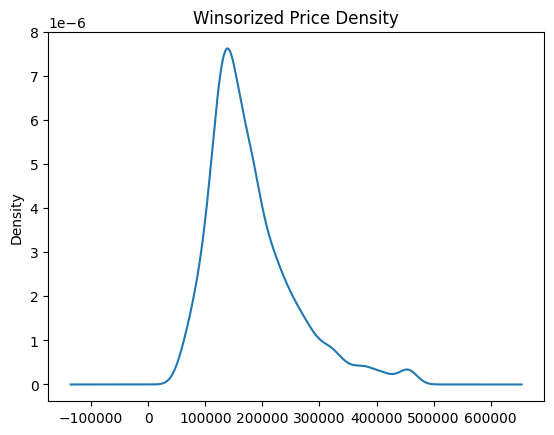

In [102]:
# Q7.6 Winsorization
# Clipping at 1st and 99th percentiles
lower = df_ames['price'].quantile(0.01)
upper = df_ames['price'].quantile(0.99)

df_ames['price_winsorized'] = df_ames['price'].clip(lower, upper)

print("Winsorized Price Stats:")
print(df_ames['price_winsorized'].describe())

df_ames['price_winsorized'].plot(kind='kde', title='Winsorized Price Density')
plt.show()


**Q7.6 Result:**
Winsorizing the price variable handled the outliers by capping the extreme values at the 1st and 99th percentiles. This brought the standard deviation down from about 80k to 73k creating a more compact distribution and reducing the stretch caused by those few very high-priced properties.
